<a href="https://colab.research.google.com/github/krubjorn/TIARA/blob/main/SoilMoisture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Authenticate and Load Libraries**

In [2]:
import ee
ee.Authenticate()
ee.Initialize(project='essential-truth-428417-b5')


In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
# Load the SMAP dataset
smap_collection = ee.ImageCollection('NASA-USDA/HSL/SMAP_soil_moisture')

**2. Define the region of Africa**

In [4]:
africa_geometry = ee.Geometry.Polygon(
    [[[-20, -40], [55, -40], [55, 40], [-20, 40]]])

# Filter the SMAP collection for the specified years
filtered_smap = smap_collection.filterDate('2000-01-01', '2000-12-31') \
    .merge(smap_collection.filterDate('2015-01-01', '2015-12-31')) \
    .merge(smap_collection.filterDate('2023-01-01', '2023-12-31')) \
    .filterBounds(africa_geometry)


**3. Extract surface soil moisture (SSM) values for Africa.**

In [7]:
# Select the SSM band
ssm_band = 'ssm'
filtered_smap = filtered_smap.select(ssm_band)

# Calculate the mean SSM for each year
mean_ssm = filtered_smap.reduce(ee.Reducer.mean())


**African Region Plots**

NameError: name 'cartopy' is not defined

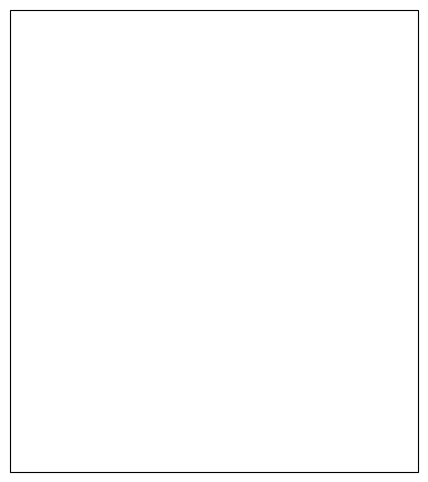

In [12]:

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# Set the extent to cover Africa coordinates
ax.set_extent([-20, 60, -40, 40], crs=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

plt.title('Map of Africa in Robinson Projection')
plt.show()

In [15]:
# Import necessary libraries
import ee
import geemap

# Initialize the Earth Engine module
ee.Initialize()

# Define the time periods
period1 = ('1980-01-01', '2000-12-31')
period2 = ('2001-01-01', '2020-12-31')
period3 = ('2000-01-01', '2014-12-31')
period4 = ('2015-01-01', '2021-12-31')  # Replace with current date


In [16]:

# Define the region of interest (Africa)
africa = ee.FeatureCollection("NASA/SMAP/SPL4SMGP/007").filter(ee.Filter.eq('wld_rgn', 'Africa'))

# Load the soil moisture data
# dataset = ee.ImageCollection('NASA_USDA/HSL/soil_moisture')
dataset = ee.ImageCollection("NASA/SMAP/SPL4SMGP/007")



In [ ]:
africa

In [17]:

# Function to calculate average soil moisture for a given period
def calculate_average(period):
    start_date, end_date = period
    return dataset.select('sm_rootzone').filterDate(start_date, end_date).mean().clip(africa)

# Calculate averages for each period
average1 = calculate_average(period1)
average2 = calculate_average(period2)
average3 = calculate_average(period3)
average4 = calculate_average(period4)

# Create a map
Map = geemap.Map()

# Add layers to the map
Map.addLayer(average1, {}, '1980-2000')
Map.addLayer(average2, {}, '2001-2020')
Map.addLayer(average3, {}, '2000-2014')
Map.addLayer(average4, {}, '2015-current')

# Display the map
Map

EEException: Image.clip: The area for image clipping must not be an ImageCollection.